# Google Data Analytics Capstone | Cyclistic Bike-Share Analysis Project

## About this project: 

The Google Data Analytics Capstone Project, Case Study-1, focuses on analyzing the data of Cyclistic, a fictional bike-share company.
The project aims to understand ridership patterns and behavior to optimize marketing strategies and increase ridership. By utilizing data analysis techniques and tools, the project seeks to uncover valuable insights that can drive business decisions and improve the overall performance of Cyclistic.

## About "Cyclistic Bike-Share":


Cyclistic is a bike-share company launched in 2016, Operates a fleet of 5,824 bicycles across 692 stations in Chicago.

Bikes are geotracked and can be unlocked and returned at any station.

Offers pricing plans: single-ride passes, full-day passes, and annual memberships;

Casual riders: customers with single-ride or full-day passes

Annual members: customers with annual memberships.

Financial analysis shows annual members are more profitable.

Goal: Convert casual riders into annual members

Strategy: Leverage existing awareness and choice of Cyclistic for mobility needs


## Libraries & Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
# Load DataSet

df1 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202201-divvy-tripdata.csv')

df2 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202202-divvy-tripdata.csv')

df3 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202203-divvy-tripdata.csv')

df4 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202204-divvy-tripdata.csv')

df5 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202205-divvy-tripdata.csv')

df6 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202206-divvy-tripdata.csv')

df7 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202207-divvy-tripdata.csv')

df8 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202208-divvy-tripdata.csv')

df9 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202209-divvy-tripdata.csv')

df10 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202210-divvy-tripdata.csv')

df11 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202211-divvy-tripdata.csv')

df12 = pd.read_csv('C:/Users/meher/OneDrive/Desktop/Cyclistic Case Study/Datasets/202212-divvy-tripdata.csv')

In [5]:
# Checking the datasets...

# .head() function show us data head which means first some rows.

df3.head()

,ride_id,rideable_type,started_at,start_date,start_time,ended_at,end_date,end_time,day,month,member_casual,duration
0,47EC0A7F82E65D52,classic_bike,3/21/2022 13:45,3/21/2022,13:45:01,3/21/2022 13:51,3/21/2022,13:51:18,Wednesday,March,member,0:06:00
1,8494861979B0F477,electric_bike,3/16/2022 9:37,3/16/2022,9:37:16,3/16/2022 9:43,3/16/2022,9:43:34,Wednesday,March,member,0:06:00
2,EFE527AF80B66109,classic_bike,3/23/2022 19:52,3/23/2022,19:52:02,3/23/2022 19:54,3/23/2022,19:54:48,Tuesday,March,member,0:02:00
3,9F446FD9DEE3F389,classic_bike,3/1/2022 19:12,3/1/2022,19:12:26,3/1/2022 19:22,3/1/2022,19:22:14,Monday,March,member,0:10:00
4,431128AD9AFFEDC0,classic_bike,3/21/2022 18:37,3/21/2022,18:37:01,3/21/2022 19:19,3/21/2022,19:19:11,Monday,March,member,0:42:00


In [4]:
# .tail() function show us data's tail which means last some rows.


df4.tail()

In [86]:
## Data Combining.....

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

## I concatenate the individual datasets into a single DataFrame "df".

In [87]:
df.head(10)

,ride_id,rideable_type,started_at,start_date,start_time,ended_at,end_date,end_time,day,month,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13,11:59:47,2022-01-13 12:02:00,01/13/2022,12:02:44,Thursday,January,casual,0:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10,8:41:56,2022-01-10 08:46:00,01/10/2022,8:46:17,Monday,January,casual,0:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25,4:53:40,2022-01-25 04:58:00,01/25/2022,4:58:01,Tuesday,January,member,0:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04,0:18:04,2022-01-04 00:33:00,01/04/2022,0:33:00,Tuesday,January,casual,0:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20,1:31:10,2022-01-20 01:37:00,01/20/2022,1:37:12,Thursday,January,member,0:06:02
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:00,2022-01-11,18:48:09,2022-01-11 18:51:00,01/11/2022,18:51:31,Tuesday,January,member,0:03:22
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:00,2022-01-30,18:32:52,2022-01-30 18:49:00,01/30/2022,18:49:26,Sunday,January,member,0:16:34
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:00,2022-01-22,12:20:02,2022-01-22 12:32:00,01/22/2022,12:32:06,Saturday,January,member,0:12:04
8,154222B86A338ABD,electric_bike,2022-01-17 07:34:00,2022-01-17,7:34:41,2022-01-17 08:00:00,01/17/2022,8:00:08,Monday,January,member,0:25:27
9,72DC25B2DD467EEF,classic_bike,2022-01-28 15:27:00,2022-01-28,15:27:53,2022-01-28 15:35:00,01/28/2022,15:35:16,Friday,January,member,0:07:23


In [12]:
# remove individual month data frames to clear up space in the environment
del df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12


## Data Preprocessing

Data Conversion & Manipulation

In [175]:
# The column names are renamed using the .rename() function.

df.rename(columns = {'rideable_type':'bike_type', 'member_casual': 'rider_type', 'duration': 'ride_length',
                     'start_date' : 'date', 'start_time' : 'time', 'day':'weekday'}, inplace = True)

C:\Users\meher\AppData\Local\Temp\ipykernel_11112\1775203428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'rideable_type':'bike_type', 'member_casual': 'rider_type', 'duration': 'ride_length',


In [92]:
# The column names are displayed using '.columns'

df.columns

Index(['ride_id', 'bike_type', 'started_at', 'date', 'time', 'ended_at',
       'end_date', 'end_time', 'day', 'month', 'rider_type', 'ride_length'],
      dtype='object')

In [137]:
# Excluding error values because in ride length column, there's error value like '#########'.

df = df[~df['ride_length'].str.contains('#####')]

Rows with error values in the 'ride_length' column (indicated by '#####') are removed using boolean indexing.

In [89]:
df.tail(1000)

,ride_id,bike_type,started_at,date,time,ended_at,end_date,end_time,day,month,rider_type,ride_length
180806,97F067CA5E87B718,classic_bike,2022-12-18 13:44:00,2022-12-18,13:44:28,2022-12-18 13:44:00,12/18/2022,13:44:36,Sunday,December,member,0:00:00
180807,745479C843C13C4A,electric_bike,2022-12-04 20:38:00,2022-12-04,20:38:49,2022-12-04 20:38:00,12/4/2022,20:38:57,Sunday,December,member,0:00:00
180808,562887252906E699,classic_bike,2022-12-06 20:08:00,2022-12-06,20:08:19,2022-12-06 20:08:00,12/6/2022,20:08:27,Tuesday,December,member,0:00:00
180809,B5224DB638B563C6,electric_bike,2022-12-17 16:08:00,2022-12-17,16:08:23,2022-12-17 16:08:00,12/17/2022,16:08:31,Saturday,December,member,0:00:00
180810,9F462A8C89C2C305,electric_bike,2022-12-12 13:03:00,2022-12-12,13:03:11,2022-12-12 13:03:00,12/12/2022,13:03:19,Monday,December,member,0:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
181801,0D6D8E1FB6361A7F,classic_bike,2022-12-09 17:00:00,2022-12-09,17:00:05,2022-12-09 17:00:00,12/9/2022,17:00:05,Friday,December,member,0:00:00
181802,CE8B25EE8BC25DF2,electric_bike,2022-12-18 11:54:00,2022-12-18,11:54:47,2022-12-18 11:54:00,12/18/2022,11:54:47,Sunday,December,casual,0:00:00
181803,1C9AC091E19D9909,electric_bike,2022-12-08 17:05:00,2022-12-08,17:05:32,2022-12-08 17:05:00,12/8/2022,17:05:32,Thursday,December,member,0:00:00
181804,4EEBB6ACBEBE8E80,electric_bike,2022-12-10 13:33:00,2022-12-10,13:33:49,2022-12-10 13:33:00,12/10/2022,13:33:49,Saturday,December,member,0:00:00


In [90]:
# data's dimension checking.....

df.shape

(5667634, 12)

In [93]:
# convert 'duration' column to timedelta format
df['ride_length'] = pd.to_timedelta(df['ride_length'])

# df12['started_at'] = pd.to_datetime(df12['started_at'], errors='coerce')
# df12['ended_at'] = pd.to_datetime(df12['ended_at'], errors='coerce')
# df12['start_date'] = pd.to_datetime(df12['start_date'], errors='coerce')
# df2['start_time'] = pd.to_datetime(df2['start_time'], errors='coerce')
# df2['end_date'] = pd.to_datetime(df2['end_date'], errors='coerce')
# df2['end_time'] = pd.to_datetime(df2['end_time'], errors='coerce')

In [1]:
# Convert duration to minutes and round off

df['ride_length'] = round(df['ride_length'].dt.total_seconds() / 60)

In [95]:
df['ride_length'] = df['ride_length'].astype(int)
df['ride_length']

0          3
1          4
2          4
3         15
4          6
          ..
181801     0
181802     0
181803     0
181804     0
181805     0
Name: ride_length, Length: 5667634, dtype: int32

In [91]:
# The data types of columns are checked using '.info()' 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667634 entries, 0 to 181805
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   ride_id      object        
 1   bike_type    object        
 2   started_at   datetime64[ns]
 3   date         datetime64[ns]
 4   time         object        
 5   ended_at     datetime64[ns]
 6   end_date     object        
 7   end_time     object        
 8   day          object        
 9   month        object        
 10  rider_type   object        
 11  ride_length  object        
dtypes: datetime64[ns](3), object(9)
memory usage: 562.1+ MB


Feature Engineering

In [179]:
# create a new column named 'hour' after 'start_time' column

# df.insert(loc=df.columns.get_loc('time')+1, column='hour', value=df['started_at'].dt.round('H').dt.hour)

df.insert(loc=df.columns.get_loc('weekday')+1, column='month_day', value=df['started_at'].dt.day.astype(str).str.zfill(2))


In [103]:
ended_at = df.pop('ended_at')
df.insert(loc=df.columns.get_loc('month')+1, column='ended_at', value=ended_at)

In [107]:
# create column for different seasons: Spring, Summer, Fall, Winter


df['season'] = np.select([(df['month'] == 'March') | (df['month'] == 'April') | (df['month'] == 'May'),
                          (df['month'] == 'June') | (df['month'] == 'July') | (df['month'] == 'August'),
                          (df['month'] == 'September') | (df['month'] == 'October') | (df['month'] == 'November'),
                          (df['month'] == 'December') | (df['month'] == 'January') | (df['month'] == 'February')],
                         ['Spring', 'Summer', 'Fall', 'Winter'])

In [123]:

# create column for different time_of_day: Night, Morning, Afternoon, Evening


df['time_of_day'] = np.select([(df['hour'].isin([0, 1, 2, 3, 4, 5])),
                               (df['hour'].isin([6, 7, 8, 9, 10, 11])),
                               (df['hour'].isin([12, 13, 14, 15, 16, 17])),
                               (df['hour'].isin([18, 19, 20, 21, 22, 23]))],
                              ['Night', 'Morning', 'Afternoon', 'Evening'], default='Unknown')

In [7]:
df.head()


,ride_id,bike_type,started_at,date,time,hour,weekday,month_day,month,ended_at,rider_type,ride_length,season,time_of_day
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13,11:59:47,12,Thursday,13,January,2022-01-13 12:02:00,casual,3,Winter,Afternoon
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10,8:41:56,9,Monday,10,January,2022-01-10 08:46:00,casual,4,Winter,Morning
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25,4:53:40,5,Tuesday,25,January,2022-01-25 04:58:00,member,4,Winter,Night
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04,0:18:04,0,Tuesday,4,January,2022-01-04 00:33:00,casual,15,Winter,Night
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20,1:31:10,2,Thursday,20,January,2022-01-20 01:37:00,member,6,Winter,Night


## EDA Process

In [3]:
# Variable Identification...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5596330 entries, 0 to 5596329
Data columns (total 14 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   ride_id      object
 1   bike_type    object
 2   started_at   object
 3   date         object
 4   time         object
 5   hour         int64 
 6   weekday      object
 7   month_day    int64 
 8   month        object
 9   ended_at     object
 10  rider_type   object
 11  ride_length  int64 
 12  season       object
 13  time_of_day  object
dtypes: int64(3), object(11)
memory usage: 597.8+ MB


In [143]:
# Descriptive statistics of the DataFrame are obtained using '.describe()'

df.describe()

C:\Users\meher\AppData\Local\Temp\ipykernel_14128\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
C:\Users\meher\AppData\Local\Temp\ipykernel_14128\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
C:\Users\meher\AppData\Local\Temp\ipykernel_14128\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
C:\Users\m

,ride_id,bike_type,started_at,start_date,start_time,ended_at,end_date,end_time,day,month,rider_type,ride_length
count,5667634,5667634,5667634,5667634,5667634,5667634,5667634,5667634,5667634,5667634,5667634,5667634
unique,5665696,3,456694,365,191131,457265,367,137867,7,12,2,7004
top,2.60E+15,electric_bike,2022-06-07 17:05:00,2022-07-09 00:00:00,2023-05-03 17:05:56,2022-05-30 17:24:00,2022-07-09 00:00:00,2023-05-03 17:27:14,Saturday,July,member,0:05:00
freq,10,2888971,102,36150,209,90,36043,202,916093,823473,3345648,357297
first,NaN,NaN,2022-01-01 00:00:00,2022-01-01 00:00:00,NaN,2022-01-01 00:01:00,2022-01-01 00:00:00,2023-05-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-12-31 23:59:00,2022-12-31 00:00:00,NaN,2023-01-02 04:56:00,2023-01-02 00:00:00,2023-05-04 23:59:58,NaN,NaN,NaN,NaN


In [142]:
# The number of unique (distinct) values in each column is calculated using '.nunique()'

df.nunique()

ride_id        5665696
bike_type            3
started_at      456694
start_date         365
start_time      191131
ended_at        457265
end_date           367
end_time        137867
day                  7
month               12
rider_type           2
ride_length       7004
dtype: int64

Missing Values Analysis

In [141]:
#  Check missing values count

df.isnull().sum()

ride_id        0
bike_type      0
started_at     0
start_date     0
start_time     0
ended_at       0
end_date       0
end_time       0
day            0
month          0
rider_type     0
ride_length    0
dtype: int64

In [62]:
#  Check missing values count

df.duplicated().sum()

0

In [49]:
# clean the data

## remove rows with NA values
df.dropna(inplace=True)

## remove duplicate rows
df.drop_duplicates(inplace=True)

## remove where ride_length is 0 or negative
df = df[df['ride_length'] > 0]

df.shape

(5596330, 14)

In [178]:
# remove columns that are not needed.....

df.drop(columns=['end_date', 'end_time'], inplace=True) 

C:\Users\meher\AppData\Local\Temp\ipykernel_11112\2980262745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['month_day'], inplace=True) # remove columns not needed


In [4]:
#  Summary Statistics

#  Calculate mean and standard deviation

mean = df['ride_length'].mean()
std = df['ride_length'].std()

print(f"Mean: {mean}, Standard Deviation: {std}")


Mean: 19.694022868558502, Standard Deviation: 177.18034461388237


Univariate Analysis

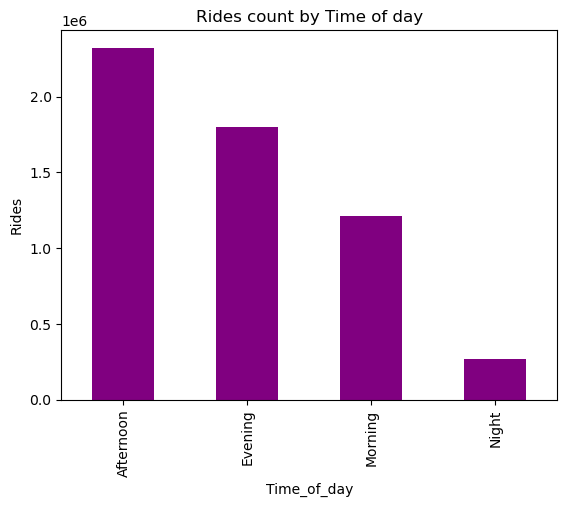

In [23]:
# Example: Bar plot for a categorical variable 'time_of_day'
df['time_of_day'].value_counts().plot(kind='bar', color = 'purple')
plt.xlabel('Time_of_day')
plt.ylabel('Rides')
plt.title('Rides count by Time of day')
plt.show()

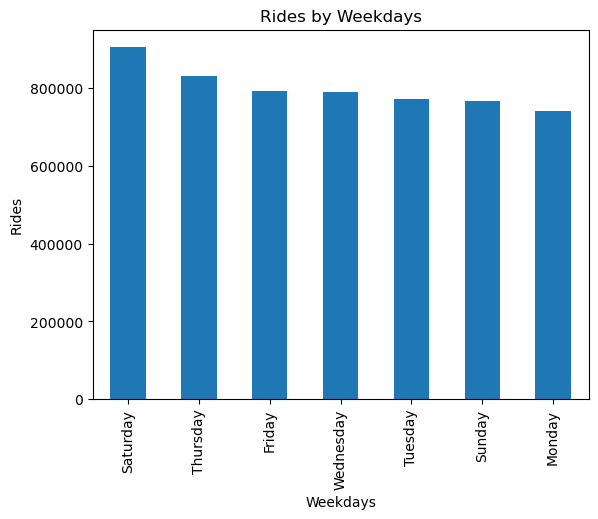

In [5]:
# Example: Bar plot for a categorical variable 'weekday'
df['weekday'].value_counts().plot(kind='bar')
plt.xlabel('Weekdays')
plt.ylabel('Rides')
plt.title('Rides by Weekdays')
plt.show()

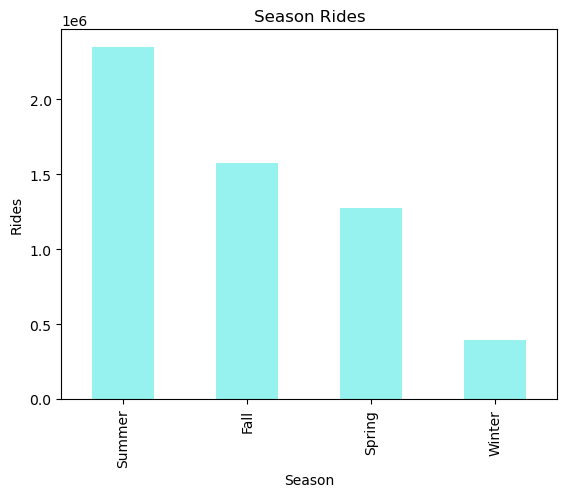

In [18]:
#  Bar plot for a categorical variable 'Season'
df['season'].value_counts().plot(kind='bar', color = '#96f2ee')
plt.xlabel('Season')
plt.ylabel('Rides')
plt.title('Season Rides')
plt.show()

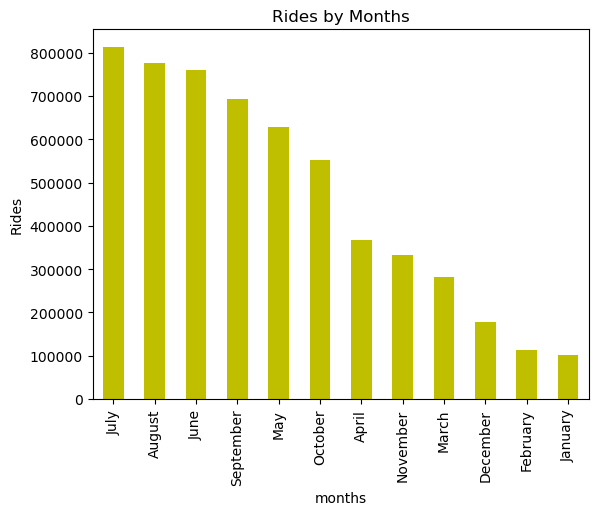

In [10]:
# Bar plot for a categorical variable 'month'

df['month'].value_counts().plot(kind='bar', color = 'y')
plt.xlabel('months')
plt.ylabel('Rides')
plt.title('Rides by Months')
plt.show()

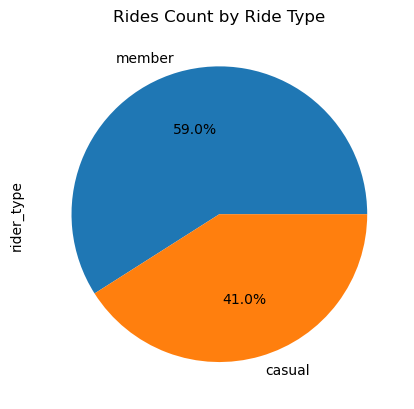

In [21]:
# Example: Pie chart for a categorical variable 'rider_type'

df['rider_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Rides Count by Ride Type')
plt.show()

In [8]:
#  Creating final data by copying as 'final_data' from previous data (df)...

final_data = df.copy()

In [9]:
# clean the data
final_data.drop(columns=['time', 'started_at', 'ended_at'], inplace=True) # remove columns not needed

In [12]:
final_data

,ride_id,bike_type,date,hour,weekday,month_day,month,rider_type,ride_length,season,time_of_day
0,C2F7DD78E82EC875,electric_bike,2022-01-13,12,Thursday,13,January,casual,3,Winter,Afternoon
1,A6CF8980A652D272,electric_bike,2022-01-10,9,Monday,10,January,casual,4,Winter,Morning
2,BD0F91DFF741C66D,classic_bike,2022-01-25,5,Tuesday,25,January,member,4,Winter,Night
3,CBB80ED419105406,classic_bike,2022-01-04,0,Tuesday,4,January,casual,15,Winter,Night
4,DDC963BFDDA51EEA,classic_bike,2022-01-20,2,Thursday,20,January,member,6,Winter,Night
...,...,...,...,...,...,...,...,...,...,...,...
5596325,4FEE15DACFA74B1A,electric_bike,2022-12-02,13,Friday,2,December,member,1,Winter,Afternoon
5596326,0D89C00047A9F983,electric_bike,2022-12-07,10,Wednesday,7,December,member,1,Winter,Morning
5596327,D259991D3C31A477,classic_bike,2022-12-30,14,Friday,30,December,member,1,Winter,Afternoon
5596328,0310B8FDC76C0764,classic_bike,2022-12-10,21,Saturday,10,December,member,1,Winter,Evening


In [11]:
# Saving tha data into csv format for work...

final_data.to_csv('cyclistic_trips2022.csv', index=False)

# Analysis Process

In [13]:
#----------------------------------TOTAL RIDES-----------------------------------

# Total number of rides

final_data.shape[0]

5596330

In [56]:
#--------------------------------MEMBER TYPE---------------------------------------

# Total rides by member type
final_data.groupby('rider_type').size()


rider_type
casual    2294098
member    3302232
dtype: int64

In [15]:
# Total rides by bike type
final_data.groupby('bike_type').size()

bike_type
classic_bike     2578036
docked_bike       176570
electric_bike    2841724
dtype: int64

In [16]:

# Total rides by member type and bike type
final_data.groupby(['rider_type', 'bike_type']).size()

rider_type  bike_type    
casual      classic_bike      884228
            docked_bike       176570
            electric_bike    1233300
member      classic_bike     1693808
            electric_bike    1608424
dtype: int64

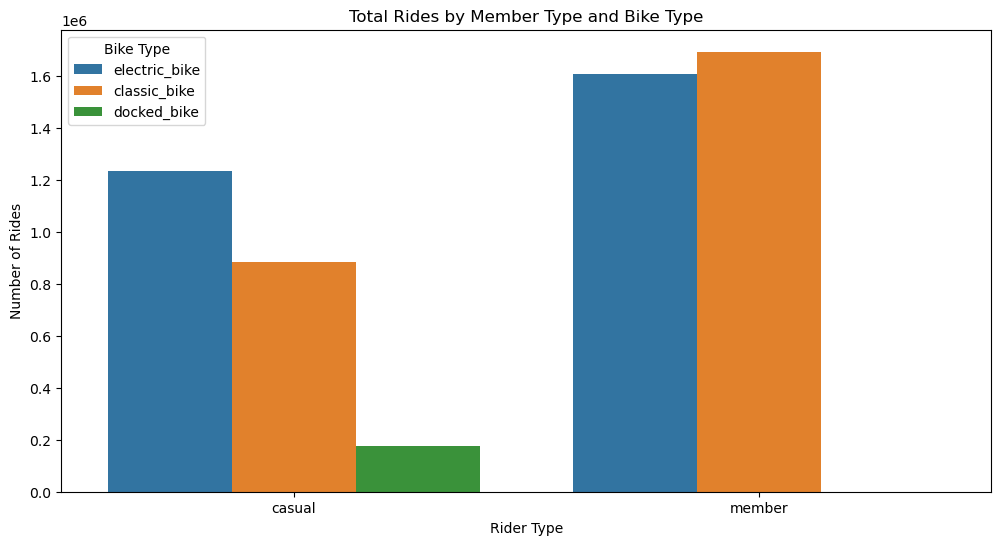

In [57]:
# Visualize total rides by rider type and bike type
plt.figure(figsize=(12,6))
sns.countplot(data=final_data, x='rider_type', hue='bike_type')
plt.title('Total Rides by Member Type and Bike Type')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')
plt.legend(title='Bike Type')
plt.show()

In [17]:
#-----------------------------------HOUR--------------------------------------------

# Total rides by hour
final_data.groupby('hour').size().to_frame().T

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,100918,61497,42159,23104,16502,22214,77570,165485,267509,238196,...,340973,357237,443029,536185,532133,408634,300685,221611,192786,142865


In [18]:

# Total rides by member type and hour
final_data.groupby(['rider_type', 'hour']).size()

rider_type  hour
casual      0        54915
            1        35095
            2        24868
            3        13527
            4         8982
            5         7866
            6        18806
            7        38852
            8        64415
            9        67609
            10       81941
            11      103613
            12      137243
            13      143211
            14      155696
            15      163748
            16      188887
            17      207787
            18      212023
            19      170981
            20      129392
            21       97889
            22       92518
            23       74234
member      0        46003
            1        26402
            2        17291
            3         9577
            4         7520
            5        14348
            6        58764
            7       126633
            8       203094
            9       170587
            10      134676
            11      140957
           

In [19]:
#-----------------------------------TIME OF DAY-------------------------------------

# Morning
final_data.loc[final_data['time_of_day'] == 'Morning'].groupby('rider_type')['time_of_day'].size()

rider_type
casual    375236
member    834711
Name: time_of_day, dtype: int64

In [20]:
# Afternoon
final_data.loc[final_data['time_of_day'] == 'Afternoon'].groupby('rider_type')['time_of_day'].size()

rider_type
casual     996572
member    1324703
Name: time_of_day, dtype: int64

In [21]:
# Evening
final_data.loc[final_data['time_of_day'] == 'Evening'].groupby('rider_type')['time_of_day'].size()

rider_type
casual     777037
member    1021677
Name: time_of_day, dtype: int64

In [22]:
# Night
final_data.loc[final_data['time_of_day'] == 'Night'].groupby('rider_type')['time_of_day'].size()


rider_type
casual    145253
member    121141
Name: time_of_day, dtype: int64

In [72]:

# All times of day
tod_rides = final_data.groupby(['rider_type', 'time_of_day']).size().to_frame().T

tod_rides

rider_type     casual                            member                   \
time_of_day Afternoon Evening Morning   Night Afternoon  Evening Morning   
0              996572  777037  375236  145253   1324703  1021677  834711   

rider_type           
time_of_day   Night  
0            121141

In [73]:
final_data.groupby(['time_of_day']).size().to_frame().T

time_of_day,Afternoon,Evening,Morning,Night
0,2321275,1798714,1209947,266394


In [76]:
# Visualize total rides by time of day and member type
# plt.figure(figsize=(12,6))
# sns.barplot(data=tod_rides, x=tod_rides.index, y='rides', hue='member_type')
# plt.title('Total Rides by Time of Day and Rider Type')
# plt.xlabel('Time of Day')
# plt.ylabel('Number of Rides')
# plt.show()

In [24]:
#--------------------------------DAY OF THE WEEK-------------------------------------

# Total rides by day of week
final_data.groupby('weekday').size().to_frame().T

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,791681,741810,904141,766658,831051,772699,788290


In [25]:

# Total rides by member type and day of week
final_data.groupby(['rider_type', 'weekday']).size().to_frame().T

rider_type  casual                                                      \
weekday     Friday  Monday Saturday  Sunday Thursday Tuesday Wednesday   
0           331593  274052   464720  382329   306600  262822    271982   

rider_type  member                                                      
weekday     Friday  Monday Saturday  Sunday Thursday Tuesday Wednesday  
0           460088  467758   439421  384329   524451  509877    516308

In [34]:
#--------------------------------DAY OF THE MONTH------------------------------------


# Total rides by day of month
final_data.groupby('month_day').size().to_frame().T.head(50)

month_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,185892,188780,184610,176398,184059,165444,169514,162743,211904,214815,...,185673,203768,177027,144032,177810,166845,188343,194041,184471,107996


In [31]:

# Total rides by member type and day of month
final_data.groupby(['rider_type', 'month_day']).size().head(50)

rider_type  month_day
casual      1             71238
            2             77574
            3             80769
            4             72552
            5             78824
            6             63852
            7             62680
            8             58608
            9             90685
            10            92502
            11            69521
            12            71396
            13            76949
            14            79143
            15            65109
            16            85870
            17            76400
            18            69744
            19            74873
            20            74407
            21            79935
            22            76207
            23            91322
            24            76380
            25            56497
            26            72000
            27            64006
            28            75829
            29            82861
            30            83516
            31    

In [40]:
#-----------------------------------MONTH-------------------------------------------

# Total rides by month
final_data.groupby('month').size().to_frame().T

month,April,August,December,February,January,July,June,March,May,November,October,September
0,366649,775751,178916,113955,102543,813205,760094,280932,627384,333180,551089,692632


In [36]:

# Total rides by member type and month
final_data.groupby(['rider_type', 'month']).size().to_frame().T

rider_type  casual                                                           \
month        April  August December February January    July    June  March   
0           124949  354439    44217    21110   18249  401248  364911  88936   

rider_type                   ...   member                                   \
month          May November  ... December February January    July    June   
0           277229    99376  ...   134699    92845   84294  411957  395183   

rider_type                                             
month        March     May November October September  
0           191996  350155   233804  344836    399451  

[1 rows x 24 columns]

In [45]:
#-----------------------------------SEASON------------------------------------------

# Spring
final_data.loc[final_data['season'] == 'Spring'].groupby('rider_type')['season'].size()


rider_type
casual    491114
member    783851
Name: season, dtype: int64

In [44]:
#-----------------------------------SEASON------------------------------------------

# Summer
final_data.loc[final_data['season'] == 'Summer'].groupby('rider_type')['season'].size()


rider_type
casual    1120598
member    1228452
Name: season, dtype: int64

In [43]:
#-----------------------------------SEASON------------------------------------------

# Fall
final_data.loc[final_data['season'] == 'Fall'].groupby('rider_type')['season'].size()


rider_type
casual    598810
member    978091
Name: season, dtype: int64

In [42]:
#-----------------------------------SEASON------------------------------------------

# Winter
final_data.loc[final_data['season'] == 'Winter'].groupby('rider_type')['season'].size()


rider_type
casual     83576
member    311838
Name: season, dtype: int64

In [41]:
#-----------------------------------SEASON------------------------------------------

# All seasons
final_data.groupby(['season', 'rider_type']).size()

season  rider_type
Fall    casual         598810
        member         978091
Spring  casual         491114
        member         783851
Summer  casual        1120598
        member        1228452
Winter  casual          83576
        member         311838
dtype: int64

In [47]:
#--------------------------AVERAGE RIDE LENGTH-------------------------------------

# Average ride length
avgRide = final_data['ride_length'].mean()
print(avgRide)


19.694022868558502


In [46]:

# Average ride length by member type
final_data.groupby('rider_type')['ride_length'].mean()

rider_type
casual    29.500508
member    12.881346
Name: ride_length, dtype: float64

In [24]:
df

,ride_id,bike_type,started_at,date,time,hour,weekday,month_day,month,ended_at,rider_type,ride_length,season,time_of_day
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13,11:59:47,12,Thursday,13,January,2022-01-13 12:02:00,casual,3,Winter,Afternoon
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10,8:41:56,9,Monday,10,January,2022-01-10 08:46:00,casual,4,Winter,Morning
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25,4:53:40,5,Tuesday,25,January,2022-01-25 04:58:00,member,4,Winter,Night
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04,0:18:04,0,Tuesday,4,January,2022-01-04 00:33:00,casual,15,Winter,Night
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20,1:31:10,2,Thursday,20,January,2022-01-20 01:37:00,member,6,Winter,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596325,4FEE15DACFA74B1A,electric_bike,2022-12-02 13:07:00,2022-12-02,13:07:59,13,Friday,2,December,2022-12-02 13:08:00,member,1,Winter,Afternoon
5596326,0D89C00047A9F983,electric_bike,2022-12-07 10:00:00,2022-12-07,10:00:59,10,Wednesday,7,December,2022-12-07 10:01:00,member,1,Winter,Morning
5596327,D259991D3C31A477,classic_bike,2022-12-30 14:25:00,2022-12-30,14:25:59,14,Friday,30,December,2022-12-30 14:26:00,member,1,Winter,Afternoon
5596328,0310B8FDC76C0764,classic_bike,2022-12-10 21:16:00,2022-12-10,21:16:58,21,Saturday,10,December,2022-12-10 21:17:00,member,1,Winter,Evening
